# Data Mining Project3——HITS
### （1）读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def loadData():
    Data = pd.read_csv("FBtree_TestingData.csv")       #使用pandas读取数据
    newData=np.zeros((len(Data,),2),dtype=int)
    for i in range(len(Data)):                       
        newData[i]=Data['items'][i].split(" ")           #对数据进行切割
    #print(newData)
    return newData

data1=pd.read_csv("graph_1.txt",index_col=["I"])
data2=pd.read_csv("graph_2.txt",index_col=["I"])
data3=pd.read_csv("graph_3.txt",index_col=["I"])
data4=pd.read_csv("graph_4.txt",index_col=["I"])
data5=pd.read_csv("graph_5.txt",index_col=["I"])
data6=pd.read_csv("graph_6.txt",index_col=["I"])
#单向数据
load_data=loadData()
ind =load_data[:,0]
data7=pd.DataFrame(load_data[:,1],index=ind,columns=['O'])
#print(data7)
#双向数据
ind =np.append(load_data[:,0],load_data[:,1])
bi_data=np.append(load_data[:,1],load_data[:,0])
data8=pd.DataFrame(bi_data,index=ind,columns=['O'])
#print(data8)


In [21]:
#更改后的数据
data1_1=pd.read_csv("graph_1-1.txt",index_col=["I"])
data1_2=pd.read_csv("graph_1-2.txt",index_col=["I"])
data2_1=pd.read_csv("graph_2-1.txt",index_col=["I"])
data3_1=pd.read_csv("graph_3-1.txt",index_col=["I"])

## （2）数据预处理
把读取到的数据变成一对多的字典型数据

In [5]:
def data2dic(data):
    index=data.index.tolist()
    index_tostr=[str(i) for i in index]
    datas=data["O"]
    data_tostr=[str(i) for i in datas]
    dits={}
    j=0
    for i in index_tostr:
        dits.setdefault(i,[]).append(data_tostr[j])
        j=j+1
    return dits

In [22]:
dits1=data2dic(data1)
dits2=data2dic(data2)
dits3=data2dic(data3)
dits4=data2dic(data4)
dits5=data2dic(data5)
dits6=data2dic(data6)
dits7=data2dic(data7)
dits8=data2dic(data8)
dits1_1=data2dic(data1_1)
dits1_2=data2dic(data1_2)
dits2_1=data2dic(data2_1)
dits3_1=data2dic(data3_1)
print(dits3_1)

{'1': ['2'], '2': ['1'], '3': ['2'], '4': ['2']}


## （3）HITS实现过程

In [8]:
def initialize_authority(pages):
    return dict(zip(pages.keys(), [1]*len(pages)))

def clean_pages(pages):
    for page in pages:
        outside_links = []
        for i in range(len(pages[page])):
            if pages[page][i] not in pages or pages[page][i] == page: outside_links.append(i)
        outside_links.reverse()
        for outside_link in outside_links:
            pages[page].pop(outside_link)
    return pages
                
def initialize_L_matrices(pages):
    L_matrix = pages
    Lt_matrix = {}
    for page in pages:
        Lt_matrix[page] = []
    for page in pages:
        for link in pages[page]:
            Lt_matrix[link].append(page)
    return L_matrix, Lt_matrix

def multiply_matrix_vector(matrix, vector):
    result_matrix = {}
    for row in matrix:
        result_matrix[row] = 0
        for item in matrix[row]:
            result_matrix[row] += vector[item]
    return result_matrix        
            
def normalize(vector):
    max = 0
    for component in vector:
        if vector[component] > max:
            max = vector[component]
    if max == 0:
        return vector
    for component in vector:
        vector[component] = float(vector[component]) / max
    return vector
        
def vector_difference(vector1, vector2):
    if not (vector1 and vector2): return float("inf")
    total = 0
    for component in vector1:
        total += abs(vector1[component] - vector2[component])
    return total        

def HITS(pages):
    pages = clean_pages(pages)
    authority_old = None
    authority = initialize_authority(pages)
    (L_matrix, Lt_matrix) = initialize_L_matrices(pages)
    while vector_difference(authority_old, authority) > 0.1:
        authority_old = authority
        hubbiness = normalize(multiply_matrix_vector(L_matrix, authority))
        authority = normalize(multiply_matrix_vector(Lt_matrix, hubbiness))
    return authority, hubbiness

## （4）使用不同数据集运行HITS

In [9]:
def display(data, title):
    print(title)
    print("----------------------------------我是分割线------------------------------------")
    (authority, hubbiness) = HITS(data)
    print("Authority: " + str(authority))
    print("Hubbiness: " + str(hubbiness))
    
    size = len(data)
    x = np.arange(size)+1
    (authority, hubbiness) = HITS(data)
    authority_y=authority.values()
    hubbiness_y=hubbiness.values()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%.2f' % float(height))
    
    total_width, n = 0.8, 2     # 有多少个类型，只需更改n即可
    width = total_width / n
    x = x - (total_width - width) / 2

    a=plt.bar(x + width, authority_y, width=width, label='authority')
    b=plt.bar(x + 2 * width, hubbiness_y, width=width, label='hubbiness')
    autolabel(a)
    autolabel(b)

    plt.legend()
    plt.show()

数据集为：graph_1.txt
----------------------------------我是分割线------------------------------------
Authority: {'1': 0.0, '2': 1.0, '3': 1.0, '4': 1.0, '5': 1.0}
Hubbiness: {'1': 1.0, '2': 1.0, '3': 1.0, '4': 1.0, '5': 0.0}


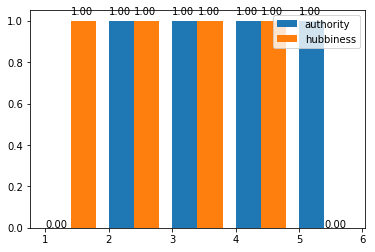

数据集为：graph_2.txt
----------------------------------我是分割线------------------------------------
Authority: {'1': 1.0, '2': 1.0, '3': 1.0, '4': 1.0, '5': 1.0}
Hubbiness: {'1': 1.0, '2': 1.0, '3': 1.0, '4': 1.0, '5': 1.0}


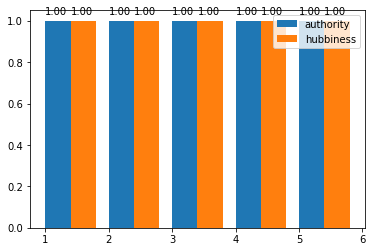

数据集为：graph_3.txt
----------------------------------我是分割线------------------------------------
Authority: {'1': 0.625, '2': 1.0, '3': 1.0, '4': 0.625}
Hubbiness: {'1': 0.6000000000000001, '2': 1.0, '3': 1.0, '4': 0.6000000000000001}


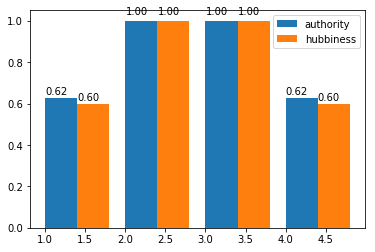

数据集为：graph_4.txt
----------------------------------我是分割线------------------------------------
Authority: {'1': 0.7056117755289789, '2': 0.8804047838086476, '3': 1.0, '4': 0.7019319227230911, '5': 0.9935602575896962, '6': 0.28610855565777366, '7': 0.41582336706531736}
Hubbiness: {'1': 1.0, '2': 0.18141592920353986, '3': 0.40044247787610626, '4': 0.7168141592920354, '5': 0.6880530973451328, '6': 0.42699115044247793, '7': 0.2455752212389381}


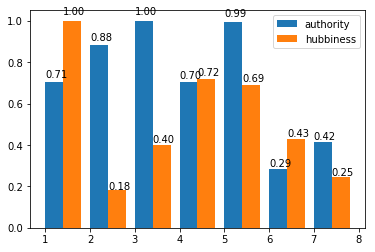

数据集为：graph_1-1.txt
----------------------------------我是分割线------------------------------------
Authority: {'1': 0.0, '2': 0.6181818181818182, '3': 1.0, '4': 0.018181818181818184, '5': 0.018181818181818184}
Hubbiness: {'1': 1.0, '2': 0.6176470588235294, '3': 0.029411764705882356, '4': 0.029411764705882356, '5': 0.0}


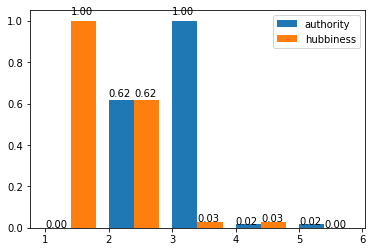

数据集为：graph_1-2.txt
----------------------------------我是分割线------------------------------------
Authority: {'1': 0.0, '2': 0.7916666666666667, '3': 1.0, '4': 1.0, '5': 1.0}
Hubbiness: {'1': 1.0, '2': 0.2631578947368421, '3': 0.2631578947368421, '4': 0.2631578947368421, '5': 0.0}


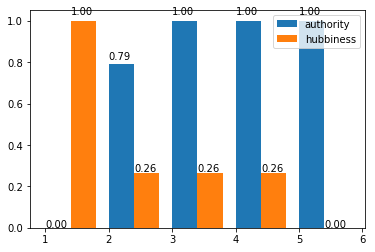

数据集为：graph_2-1.txt
----------------------------------我是分割线------------------------------------
Authority: {'1': 0.018181818181818184, '2': 0.6181818181818182, '3': 1.0, '4': 0.018181818181818184, '5': 0.018181818181818184}
Hubbiness: {'1': 1.0, '2': 0.6176470588235294, '3': 0.029411764705882356, '4': 0.029411764705882356, '5': 0.029411764705882356}


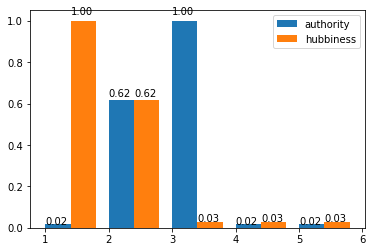

数据集为：graph_3-1.txt
----------------------------------我是分割线------------------------------------
Authority: {'1': 0.037037037037037035, '2': 1.0, '3': 0.0, '4': 0.0}
Hubbiness: {'1': 1.0, '2': 0.1111111111111111, '3': 1.0, '4': 1.0}


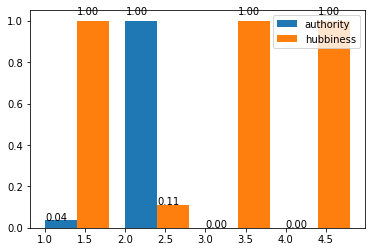

In [24]:

display(dits1,"数据集为：graph_1.txt")
display(dits2,"数据集为：graph_2.txt")
display(dits3,"数据集为：graph_3.txt")
display(dits4,"数据集为：graph_4.txt")
display(dits1_1,"数据集为：graph_1-1.txt")
display(dits1_2,"数据集为：graph_1-2.txt")
display(dits2_1,"数据集为：graph_2-1.txt")
display(dits3_1,"数据集为：graph_3-1.txt")
#display(dits5,"数据集为：graph_5.txt")
#display(dits6,"数据集为：graph_6.txt")
#display(dits7,"数据集为：project1单向")
#display(dits8,"数据集为：project1双项")

In [8]:
def show_result(data):
    size = len(data)
    x = np.arange(size)+1
    (authority, hubbiness) = HITS(data)
    #authority_x=authority.keys()
    authority_y=authority.values()
    #hubbiness_x=hubbiness.keys()
    hubbiness_y=hubbiness.values()
    
    total_width, n = 0.8, 2     # 有多少个类型，只需更改n即可
    width = total_width / n
    x = x - (total_width - width) / 2
    
    plt.bar(x + width, authority_y, width=width, label='authority')
    plt.bar(x + 2 * width, hubbiness_y, width=width, label='hubbiness')
    plt.legend()
    plt.show()
    plt.tight_layout()

[0.8 1.8 2.8 3.8 4.8 5.8 6.8]


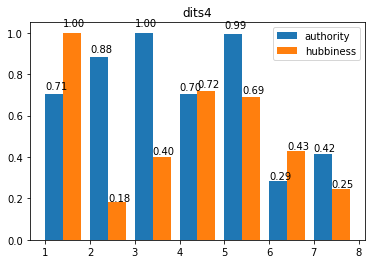

In [9]:
size = len(dits4)
x = np.arange(size)+1
(authority, hubbiness) = HITS(dits4)
authority_y=authority.values()
hubbiness_y=hubbiness.values()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%.2f' % float(height))
    
total_width, n = 0.8, 2     # 有多少个类型，只需更改n即可
width = total_width / n
x = x - (total_width - width) / 2
print(x)

plt.title("dits4")

a=plt.bar(x + width, authority_y, width=width, label='authority')
b=plt.bar(x + 2 * width, hubbiness_y, width=width, label='hubbiness')
autolabel(a)
autolabel(b)

plt.legend()
plt.show()